In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')

# Regression

In [2]:
n_obs = 100
noise_var = 1

x = sns.distributions.stats.uniform(loc=-0.5).rvs(n_obs) * 4
noise = sns.distributions.stats.norm(scale=noise_var)

y1 = lambda x: 2 * x + 1
y2 = lambda x: (x + 1)**2
y3 = lambda x: .75 * (x + 2)**2 + 3 * np.sin(3 * 2 * np.pi / 4 * x)
y4 = lambda x: np.exp(-x)

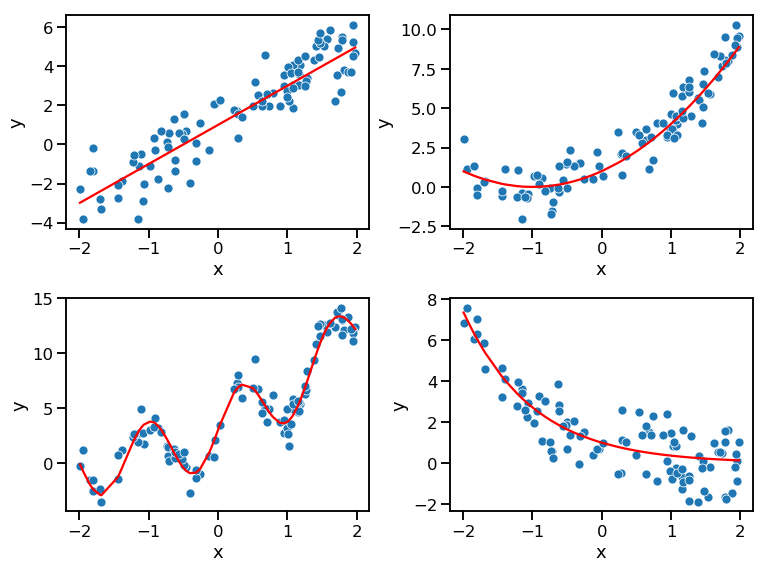

In [3]:
plt.figure(figsize=(11, 8))

for i, yi in enumerate((y1, y2, y3, y4)):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x, yi(x) + noise.rvs(n_obs))
    sns.lineplot(x, yi(x), color='r')
    plt.ylabel('y')
    plt.xlabel('x')

plt.tight_layout()
plt.savefig('../img/6_regression_examples.svg', bbox_inches='tight', pad_inches=.1)

## Least squares

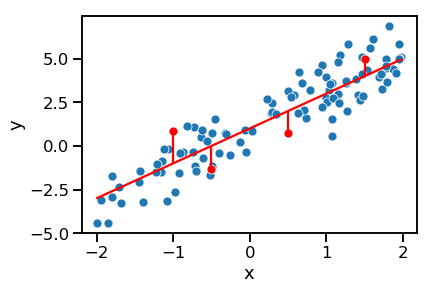

In [4]:
np.random.seed(0)
sns.scatterplot(x, y1(x) + noise.rvs(n_obs))
sns.lineplot(x, y1(x), color='red')

x_s = np.array([-1, -.5, .5, 1.5])
y_s = y1(x_s) + 1 * noise.rvs(4)
sns.scatterplot(x_s, y_s, color='red')

plt.vlines(x=x_s, ymin=y1(x_s), ymax=(y_s), color='red')
plt.ylabel('y')
plt.xlabel('x')

plt.savefig('../img/6_least_squares.svg', bbox_inches='tight', pad_inches=.1);

## Example: Linear regression

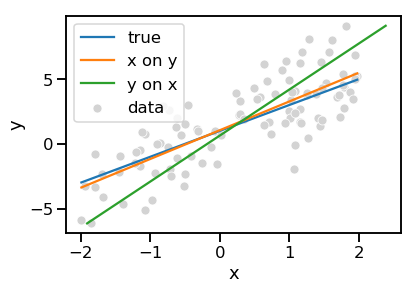

In [5]:
np.random.seed(0)
y = y1(x) + 2 * noise.rvs(n_obs)

def lin_reg(x, y):
    corr = ((x - x.mean())*(y - y.mean())).mean() / x.std() / y.std()

    slope = corr * y.std() / x.std()
    intercept = y.mean() - x.mean() * slope
    
    return slope, intercept

slope_1, intercept_1 = lin_reg(x, y)
slope_2, intercept_2 = lin_reg(y, x)

sns.scatterplot(x, y, label='data', color='lightgrey')
sns.lineplot(x, y1(x), label='true')
sns.lineplot(x, slope_1 * x + intercept_1, label='x on y')
sns.lineplot(slope_2 * y + intercept_2, y, label='y on x')

plt.ylabel('y')
plt.xlabel('x')

plt.savefig('../img/6_linear_regression.svg', bbox_inches='tight', pad_inches=.1);

## Power laws and exponential functions

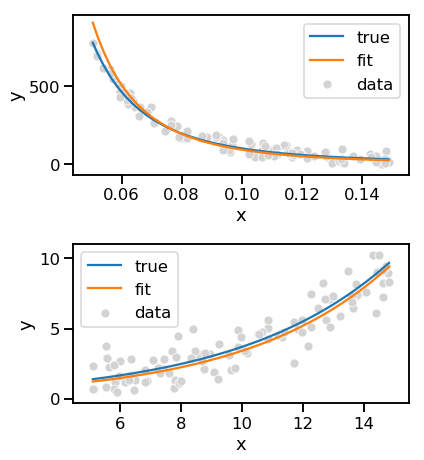

In [6]:
np.random.seed(0)

x_p = (sns.distributions.stats.uniform().rvs(n_obs) * .1 + .05)

# Power law
y_p = lambda x: .1 * x**-3
yy_p = y_p(x_p) + 29. * noise.rvs(n_obs)

ln_y = np.log(yy_p)
ln_x = np.log(x_p)

slope_p, intercept_p = lin_reg(ln_x, ln_y)

# Exponential
x_e = sns.distributions.stats.uniform().rvs(n_obs) * 10 + 5
y_e = lambda x: .5 * np.exp(.2 * x)
yy_e = y_e(x_e) + noise.rvs(n_obs)

slope_e, intercept_e = lin_reg(x_e, np.log(yy_e))

plt.figure(figsize=(6, 6.5))

plt.subplot(2, 1, 1)
sns.lineplot(x_p, y_p(x_p), label='true')
sns.scatterplot(x_p, yy_p, color='lightgrey', label='data')
sns.lineplot(x_p, np.exp(intercept_p) * x_p ** slope_p, label='fit')
plt.ylabel('y'); plt.xlabel('x')
# plt.legend();

plt.subplot(2, 1, 2)
sns.lineplot(x_e, y_e(x_e), label='true')
sns.scatterplot(x_e, yy_e, color='lightgrey', label='data')
sns.lineplot(x_e, np.exp(intercept_e) * np.exp(x_e * slope_e), label='fit')
plt.ylabel('y'); plt.xlabel('x')

plt.tight_layout()

plt.savefig('../img/6_power_expon_reg.svg', bbox_inches='tight', pad_inches=.1);

## Basis functions

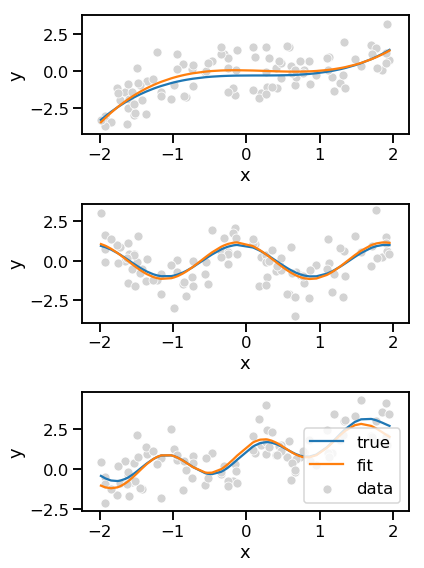

In [7]:
def solve_normal_equation(x, y):
    if x.ndim == 1:
        x.resize((-1, 1))
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

np.random.seed(0)
f1 = lambda x: .3 * (x**3 - .5*x**2 + .1 * x - 1)
f2 = lambda x: np.cos(np.pi * x + .3)
f3 = lambda x: .25 * (.75 * (x + 2)**2 + 3 * np.sin(3 * np.pi / 2 * x + .5))

x = sns.distributions.stats.uniform(loc=-0.5).rvs(n_obs) * 4

# create data
y1, y2, y3 = [f(x) + noise.rvs(n_obs) for f in (f1, f2, f3)]

# create input data (evaluated basis functions)
X = (
    np.vstack([x**3, x**2, x**1, x**0]).T,
    np.vstack([np.cos(np.pi * x), np.sin(np.pi * x)]).T,
    np.vstack(
        [x**1, x**0, np.cos(3 / 2 * np.pi * x),
         np.sin(3 / 2 * np.pi * x)]
    ).T
)

plt.figure(figsize=(6, 8))

for i, (f, y, xi) in enumerate(zip((f1, f2, f3), (y1, y2, y3), X)):

    # fit model
    coeff = solve_normal_equation(xi, y)

    # predict at observation
    y_hat = xi.dot(coeff)
    
    if i == 2:
        legend = 'brief'
    else:
        legend = False
    plt.subplot(3, 1, i+1)
    sns.lineplot(x, f(x), label='true', legend=legend)
    sns.scatterplot(x, y, color='lightgrey', label='data', legend=legend)
    sns.lineplot(x, y_hat, label='fit', legend=legend)
    
    plt.ylabel('y'); plt.xlabel('x')

plt.tight_layout()
plt.savefig('../img/6_basis_functions.svg', bbox_inches='tight', pad_inches=.1);

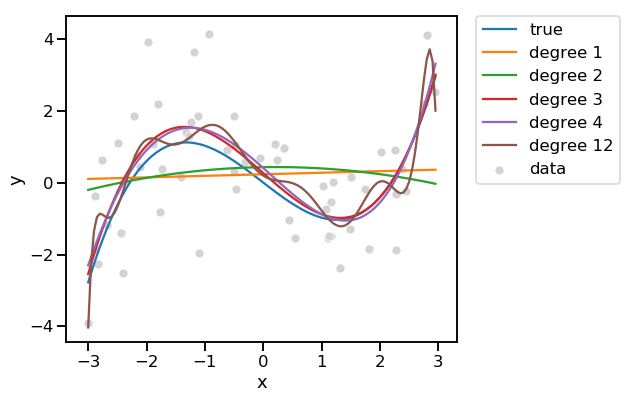

In [8]:
import copy

np.random.seed(1)

plt.figure(figsize=(7, 6))

n_obs = 60

f = lambda x: .25 * (x**3 + 0.1 * x**2 - 5 * x)# + 1. * x**2 - .3 * x) #(x**3 + 1. * x**2 - 2 * x)

x = sns.distributions.stats.uniform(loc=-0.5).rvs(n_obs) * 6
x_prediction = np.arange(-3, 3, 0.05)
y = f(x) + 1.5 * noise.rvs(n_obs)

sns.lineplot(x_prediction, f(x_prediction), label='true')
sns.scatterplot(x, y, color='lightgrey', label='data')


poly = (
    lambda x: x**0,
    lambda x: x**1,
    lambda x: x**2,
    lambda x: x**3,
    lambda x: x**4,
    lambda x: x**5,
    lambda x: x**6,
    lambda x: x**7,
    lambda x: x**8,
    lambda x: x**9,
    lambda x: x**10,
    lambda x: x**11,
    lambda x: x**12,
)

models = (
    poly[:2],
    poly[:3],
    poly[:4],
    poly[:5],
    poly
)

order = (1, 2, 3, 4, 12)

for i, (model, o) in enumerate(zip(models, order)):
    xi = np.vstack([h_m(x) for h_m in model]).T
    
    coeff = solve_normal_equation(xi, y)
    xi = np.vstack([h_m(x_prediction) for h_m in model]).T
    y_hat = xi.dot(coeff)
    sns.lineplot(x_prediction, y_hat, label='degree {}'.format(o))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.ylabel('y'); plt.xlabel('x')
# plt.ylim(-4, 6);

plt.savefig('../img/6_over_under_fitting.svg', bbox_inches='tight', pad_inches=.1);

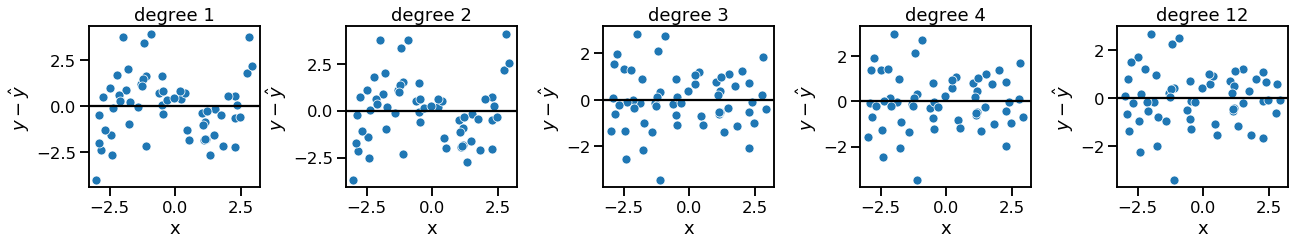

In [9]:
plt.figure(figsize=(18, 3.5))

for i, (model, o) in enumerate(zip(models, order)):
    xi = np.vstack([h_m(x) for h_m in model]).T
    
    coeff = solve_normal_equation(xi, y)
    y_hat = xi.dot(coeff)
    
    plt.subplot(1, 5, i + 1)
    sns.scatterplot(x, y - y_hat)
    plt.axhline(color='k')

    plt.title('degree {}'.format(o))
    plt.ylabel(r'$y - \hat{y}$'); plt.xlabel('x')

plt.tight_layout()
plt.savefig('../img/6_residual_plot.svg', bbox_inches='tight', pad_inches=.1);

## Bias-Variance tradeoff

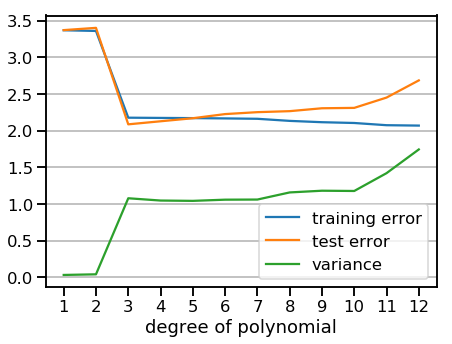

In [10]:
from sklearn.model_selection import KFold
from sklearn import linear_model

np.random.seed(0)

n_obs = 100

x = sns.distributions.stats.uniform(loc=-0.5).rvs(n_obs) * 6
y = f(x) + 1.5 * noise.rvs(n_obs)


lr = linear_model.LinearRegression()

e_test = []
e_train = []
variance = []
bias = []

model_orders = np.arange(1, 13)

for i, o in enumerate(model_orders):
    model = poly[:o+1]
    xi = np.vstack([h_m(x) for h_m in model]).T
    
    kf = KFold(n_splits=10).split(xi)
    
    test_error = []
    train_error = []
    var = []
    
    for train_index, test_index in kf:
        x_train, x_test = xi[train_index], xi[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        reg = lr.fit(x_train, y_train)
        
        y_hat_test = reg.predict(x_test)
        y_hat_train = reg.predict(x_train)
        test_error.append((y_hat_test - y_test).var())
        train_error.append((y_hat_train - y_train).var())
        var.append(y_hat_test.var())
    
    e_train.append(np.mean(train_error))
    e_test.append(np.mean(test_error))
    variance.append(np.mean(var))
    bias.append(e_train[-1] - variance[-1])


plt.figure(figsize=(7, 5))
plt.plot(model_orders, e_train, label='training error')
plt.plot(model_orders, e_test, label='test error')
plt.plot(model_orders, variance, label='variance')

plt.xticks(model_orders);
plt.gca().yaxis.grid()
plt.legend();
plt.xlabel('degree of polynomial');
plt.savefig('../img/6_bias_variance.svg', bbox_inches='tight', pad_inches=.1);

## CIs

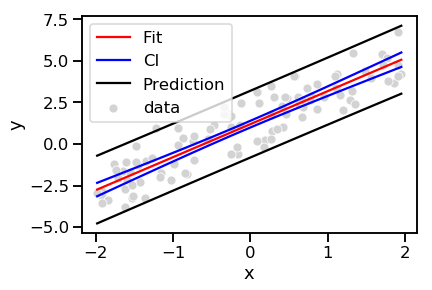

In [11]:
np.random.seed(0)

t_distr = sns.distributions.stats.t(df=n_obs-2)
x = (sns.distributions.stats.uniform(loc=-0.5).rvs(n_obs) * 4)[:, np.newaxis]
x_sorted = np.sort(x)
noise = sns.distributions.stats.norm(scale=noise_var)

y1 = lambda x: 2 * x + 1
y = y1(x) + noise.rvs(n_obs)[:, np.newaxis]

lr = linear_model.LinearRegression()

reg = lr.fit(x, y)
rho = np.corrcoef(x.squeeze(), y.squeeze())
s_r = np.sqrt(n_obs / (n_obs - 2) * (1 - rho[1, 0]**2) * y.var())
s_f = s_r * np.sqrt(1 / n_obs + (x - x.mean())**2 / (n_obs - 1) / x.std())
s_p = s_r * np.sqrt(1 + 1 / n_obs + (x - x.mean())**2 / (n_obs - 1) / x.std())

y_hat = reg.predict(x_sorted)
s_fl = y_hat + t_distr.ppf(0.025) * s_f
s_fu = y_hat + t_distr.ppf(0.975) * s_f

s_pl = y_hat + t_distr.ppf(0.025) * s_p
s_pu = y_hat + t_distr.ppf(0.975) * s_p


sns.scatterplot(x.squeeze(), y.squeeze(), color='lightgrey', label='data')
sns.lineplot(x.squeeze(), reg.predict(x).squeeze(), color='red', label='Fit')
sns.lineplot(x_sorted.squeeze(), s_fl.squeeze(), color='blue', label='CI')
sns.lineplot(x_sorted.squeeze(), s_fu.squeeze(), color='blue')
sns.lineplot(x_sorted.squeeze(), s_pl.squeeze(), color='k', label='Prediction')
sns.lineplot(x_sorted.squeeze(), s_pu.squeeze(), color='k')

# plt.fill_between(x_sorted.squeeze(), y2=s_fl.squeeze(), y1=s_fu.squeeze())

plt.ylabel('y')
plt.xlabel('x')

plt.savefig('../img/6_CI_pred.svg', bbox_inches='tight', pad_inches=.1);